In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
mnist_train = pd.read_csv('C:/Users/Tirthashree/Downloads/Projects/mnist_train.csv',header=None)
print("Train data:")
print(mnist_train.shape)
mnist_test = pd.read_csv('C:/Users/Tirthashree/Downloads/Projects/mnist_test.csv',header=None)
print("Test data:")
print(mnist_test.shape)
mnist_train.head()

Train data:
(60000, 785)
Test data:
(10000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = mnist_train.iloc[:,1:]
y_train = mnist_train.iloc[:,0]
X_test = mnist_test.iloc[:,1:]
y_test = mnist_test.iloc[:,0]
ss = StandardScaler()   
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

Variance explained: 0.6775483950426302


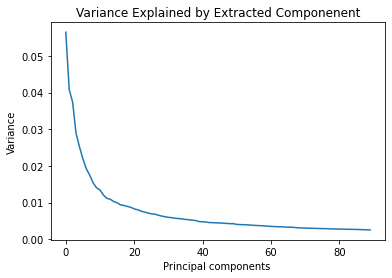

Train-set dimensions after PCA: (60000, 90)
Test-set dimensions after PCA: (10000, 90)


In [4]:
pca = RandomizedPCA(n_components=90)
pca.fit(X_train)
print("Variance explained:",np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal components ")
plt.ylabel("Variance")
plt.title('Variance Explained by Extracted Componenent')
plt.show()

# Fitting the new dimensions
new_train = pca.fit_transform(X_train)
print("Train-set dimensions after PCA:",new_train.shape)
new_test = pca.transform(X_test)
print("Test-set dimensions after PCA:",new_test.shape)

In [5]:
# Fitting training data to SVM classifier
classifier = SVC(gamma=0.01, C=3, kernel='rbf')
classifier.fit(new_train,y_train)

SVC(C=3, gamma=0.01)

In [6]:
scores = cross_val_score(classifier, new_train, y_train, cv=5) 
print("Cross validation accuracy:\n",scores)

Cross validation accuracy:
 [0.94566667 0.94066667 0.94758333 0.9435     0.95183333]


In [7]:
y_pred = classifier.predict(new_test)

In [8]:
print("Classification report:\n",classification_report(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.75      0.98      0.85      1032
           3       0.98      0.94      0.96      1010
           4       0.98      0.94      0.96       982
           5       0.98      0.94      0.96       892
           6       0.99      0.93      0.96       958
           7       0.97      0.93      0.95      1028
           8       0.98      0.94      0.96       974
           9       0.98      0.93      0.95      1009

    accuracy                           0.95     10000
   macro avg       0.96      0.95      0.95     10000
weighted avg       0.96      0.95      0.95     10000

Confusion matrix:
 [[ 948    0   27    1    0    1    2    1    0    0]
 [   1 1125    7    0    0    0    0    0    2    0]
 [   5    0 1013    3    0    0    0    6    5    0]
 [   0    0   41  951    1    6    1   